In [1]:
##### Standard Libraries #####
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("poster")

%matplotlib inline

In [2]:
##### Other Libraries #####

## Classification Algorithms ##
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

## For building models ##
from sklearn.model_selection import train_test_split
from sklearn.utils import resample

## For measuring performance ##
from sklearn import metrics
from sklearn.model_selection import cross_val_score

## To visualize decision tree ##
# from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

import pydotplus
import networkx as nx
from networkx.drawing.nx_pydot import write_dot

## Ignore warnings ##
import warnings
warnings.filterwarnings('ignore')

In [3]:
# !pip install pydotplus

In [4]:
### List columns names based on the description
col_names = ['class', 'lymphatics', 'block of affere', 'bl. of lymph. c', 'bl. of lymph. s', 'by pass', 
 'extravasates', 'regeneration of', 'early uptake in', 'lym.nodes dimin', 'lym.nodes enlar', 
'changes in lym.', 'defect in node', 'changes in node', 'changes in stru', 'special forms', 
'dislocation of', 'exclusion of no', 'no. of nodes in']

In [5]:
### Load the data
df = pd.read_csv("./lymphography (1).csv", names=col_names)
print("Size of dataset:", df.shape)
df.head()

Size of dataset: (148, 19)
Size of dataset: (148, 19)


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
0,3,4,2,1,1,1,1,1,2,1,2,2,2,4,8,1,1,2,2
1,2,3,2,1,1,2,2,1,2,1,3,3,2,3,4,2,2,2,2
2,3,3,2,2,2,2,2,2,2,1,4,3,3,4,8,3,2,2,7
3,3,3,1,1,1,1,2,1,2,1,3,3,4,4,4,3,1,2,6
4,2,3,1,1,1,1,1,1,1,1,2,2,4,3,5,1,2,2,1


In [6]:
df.describe()

,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


,class,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in
count,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000,148.000000
mean,2.452703,2.743243,1.554054,1.175676,1.047297,1.243243,1.506757,1.067568,1.702703,1.060811,2.472973,2.398649,2.966216,2.804054,5.216216,2.331081,1.662162,1.790541,2.601351
std,0.575396,0.817509,0.498757,0.381836,0.212995,0.430498,0.501652,0.251855,0.458621,0.313557,0.836627,0.568323,0.868305,0.761834,2.171368,0.777126,0.474579,0.408305,1.905023
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000,2.000000,1.000000,2.000000,1.000000
50%,2.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000,2.000000,3.000000,3.000000,5.000000,3.000000,2.000000,2.000000,2.000000
75%,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,3.000000,3.000000,4.000000,3.000000,8.000000,3.000000,2.000000,2.000000,3.000000
max,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,8.000000,3.000000,2.000000,2.000000,8.000000


In [7]:
df["class"].value_counts()

2    81
3    61
4     4
1     2
Name: class, dtype: int64

2    81
3    61
4     4
1     2
Name: class, dtype: int64

In [8]:
### Split the features and the target column.
x = df.drop('class', axis=1)
y = df['class']

print("Size of x (predictors): {}\nSize of y (target): {}".format(x.shape, y.shape))

Size of x (predictors): (148, 18)
Size of y (target): (148,)
Size of x (predictors): (148, 18)
Size of y (target): (148,)


In [9]:
### Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

### Check shape to make sure it is all in order
print("Size of x_train: {} \t Size of x_test: {} \nSize of y_train: {} \t Size of y_test: {}".format(
    x_train.shape, x_test.shape, y_train.shape, y_test.shape))

#print(y_train.value_counts(), '\n', y_test.value_counts())

Size of x_train: (103, 18) 	 Size of x_test: (45, 18) 
Size of y_train: (103,) 	 Size of y_test: (45,)
Size of x_train: (103, 18) 	 Size of x_test: (45, 18) 
Size of y_train: (103,) 	 Size of y_test: (45,)


In [10]:
df_train = pd.concat([x_train, y_train], axis=1)
print("DF Train shape:", df_train.shape, "\nDF Train value counts:\n",df_train['class'].value_counts())
df_train.head()

DF Train shape: (103, 19) 
DF Train value counts:
 2    53
3    47
4     2
1     1
Name: class, dtype: int64
DF Train shape: (103, 19) 
DF Train value counts:
 2    53
3    47
4     2
1     1
Name: class, dtype: int64


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
45,2,1,1,1,1,1,1,2,1,2,2,2,2,8,2,2,2,1,3
56,2,1,1,1,1,1,1,2,1,3,2,4,2,8,3,2,2,4,3
39,2,1,1,1,1,1,1,2,1,2,2,2,1,7,1,2,2,2,3
36,3,1,1,1,2,2,2,1,3,1,1,4,2,5,3,1,2,4,4
119,4,2,1,1,2,2,1,2,1,3,3,4,2,5,3,2,2,3,3


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
45,2,1,1,1,1,1,1,2,1,2,2,2,2,8,2,2,2,1,3
56,2,1,1,1,1,1,1,2,1,3,2,4,2,8,3,2,2,4,3
39,2,1,1,1,1,1,1,2,1,2,2,2,1,7,1,2,2,2,3
36,3,1,1,1,2,2,2,1,3,1,1,4,2,5,3,1,2,4,4
119,4,2,1,1,2,2,1,2,1,3,3,4,2,5,3,2,2,3,3


In [11]:
### Append the class with highest value counts
df_train_up = df_train[df_train["class"]==2]

### Upsample minority classes
for n in [1, 3, 4]:
    upsampled = resample(df_train[df_train["class"]==n],
                        replace=True, # sample with replacement
                        n_samples=53, # match number in majority class
                        random_state=1) # reproducible results
    df_train_up = pd.concat([df_train_up, upsampled]) 

### Print upsampled training set to check
print("Size of df_train_up:", df_train_up.shape, "\nValue counts for class:\n", df_train_up["class"].value_counts())
df_train_up.head()

Size of df_train_up: (212, 19) 
Value counts for class:
 2    53
1    53
3    53
4    53
Name: class, dtype: int64
Size of df_train_up: (212, 19) 
Value counts for class:
 2    53
1    53
3    53
4    53
Name: class, dtype: int64


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
144,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1,2
124,4,2,1,1,1,2,1,1,1,2,2,3,3,5,2,1,2,1,2
123,3,1,1,1,1,1,1,1,1,2,3,3,3,4,3,1,2,2,2
120,2,1,1,1,1,1,1,1,1,1,2,4,3,8,2,2,2,2,2
93,2,1,1,1,1,1,1,1,1,1,2,2,3,3,1,2,2,1,2


,lymphatics,block of affere,bl. of lymph. c,bl. of lymph. s,by pass,extravasates,regeneration of,early uptake in,lym.nodes dimin,lym.nodes enlar,changes in lym.,defect in node,changes in node,changes in stru,special forms,dislocation of,exclusion of no,no. of nodes in,class
144,2,1,1,1,1,1,1,1,1,1,1,1,1,3,1,2,2,1,2
124,4,2,1,1,1,2,1,1,1,2,2,3,3,5,2,1,2,1,2
123,3,1,1,1,1,1,1,1,1,2,3,3,3,4,3,1,2,2,2
120,2,1,1,1,1,1,1,1,1,1,2,4,3,8,2,2,2,2,2
93,2,1,1,1,1,1,1,1,1,1,2,2,3,3,1,2,2,1,2


In [12]:
x_train_up = df_train_up.drop(["class"], axis=1)
y_train_up = df_train_up["class"]

print("Size of x_train_up: {}\nSize of y_train_up: {}".format(x_train_up.shape, y_train_up.shape))

Size of x_train_up: (212, 18)
Size of y_train_up: (212,)
Size of x_train_up: (212, 18)
Size of y_train_up: (212,)


Build the Models

In [13]:
def confmatrix(y_pred, title):
    cm = metrics.confusion_matrix(y_test, y_pred)
    df_cm = pd.DataFrame(cm, columns=np.unique(y_test), index = np.unique(y_test))
    df_cm.index.name = 'Actual'
    df_cm.columns.name = 'Predicted'
    
    plt.figure(figsize = (10,7))
    plt.title(title)
    
    sns.set(font_scale=1.4) # For label size
    sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16}) # Font size

K-Nearest Neighbors

Build/Train the KNN model

In [14]:
### Finding the best k

best_k = {"Regular":0, "Upsampled":0}
best_score = {"Regular":0, "Upsampled":0}

for k in range(3, 50, 2):
    
    ## Using Regular / Not upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train, y_train)                              # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Regular"] and score < 100:          # Store best params
        best_score["Regular"] = score
        best_k["Regular"] = k
        
    ## Using Upsampled training set
    knn_temp = KNeighborsClassifier(n_neighbors=k)              # Instantiate the model
    knn_temp.fit(x_train_up, y_train_up)                        # Fit the model to the training set
    knn_temp_pred = knn_temp.predict(x_test)                    # Predict on the test set
    score = metrics.accuracy_score(y_test, knn_temp_pred) * 100 # Get accuracy
    if score >= best_score["Upsampled"] and score < 100:        # Store best params
        best_score["Upsampled"] = score
        best_k["Upsampled"] = k
        
### Print the best score and best k
print("---Best results---\nK: {}\nScore: {}".format(best_k, best_score))

---Best results---
K: {'Regular': 9, 'Upsampled': 11}
Score: {'Regular': 71.11111111111111, 'Upsampled': 77.77777777777779}
---Best results---
K: {'Regular': 9, 'Upsampled': 11}
Score: {'Regular': 71.11111111111111, 'Upsampled': 77.77777777777779}


Now that the optimal K is found, the final KNN models are initialized below.

In [15]:
### Build final models using the best k

## Instantiate the models
knn = KNeighborsClassifier(n_neighbors=best_k["Regular"])
knn_up = KNeighborsClassifier(n_neighbors=best_k["Upsampled"])

## Fit the model to the training set
knn.fit(x_train, y_train)
knn_up.fit(x_train_up, y_train_up)

KNeighborsClassifier(n_neighbors=11)

KNeighborsClassifier(n_neighbors=11)

Validate the KNN model

In [16]:
### Predict on the test set
knn_pred = knn.predict(x_test)
knn_pred_up = knn_up.predict(x_test)

In [17]:
### Get performance metrics
knn_score = metrics.accuracy_score(y_test, knn_pred) * 100
knn_score_up = metrics.accuracy_score(y_test, knn_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(knn, metrics.classification_report(y_test, knn_pred)))
print("Accuracy score:", knn_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(knn_up, metrics.classification_report(y_test, knn_pred_up)))
print("Accuracy score:", knn_score_up)

----- Regular Training Set Used -----
Classification report for KNeighborsClassifier(n_neighbors=9):
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.82      0.81        28
           3       0.56      0.64      0.60        14
           4       0.00      0.00      0.00         2

    accuracy                           0.71        45
   macro avg       0.34      0.37      0.35        45
weighted avg       0.67      0.71      0.69        45

Accuracy score: 71.11111111111111

----- Upsampled Training Set Used -----
Classification report for KNeighborsClassifier(n_neighbors=11):
              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       0.86      0.86      0.86        28
           3       0.64      0.64      0.64        14
           4       1.00      0.50      0.67         2

    accuracy                           0.78        45

Based on the accuracy scores, the KNN model that used upsampled data performs better than the one that used regular data.

Shown below are the confusion matrices for each KNN model.

Confusion Matrix

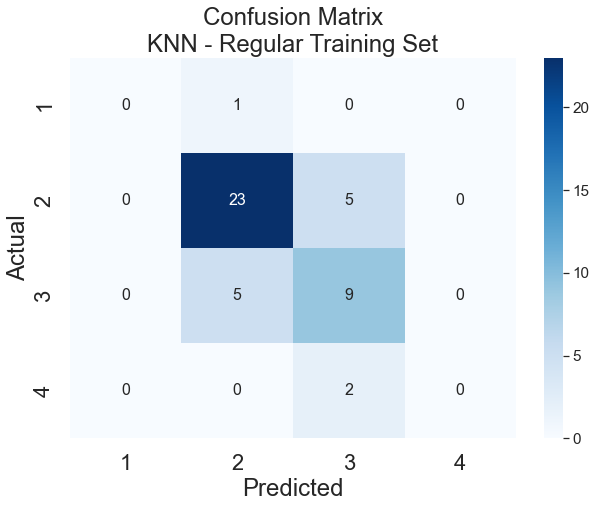

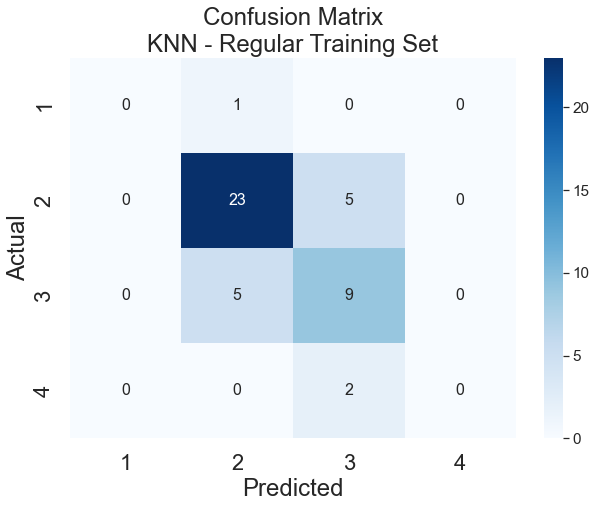

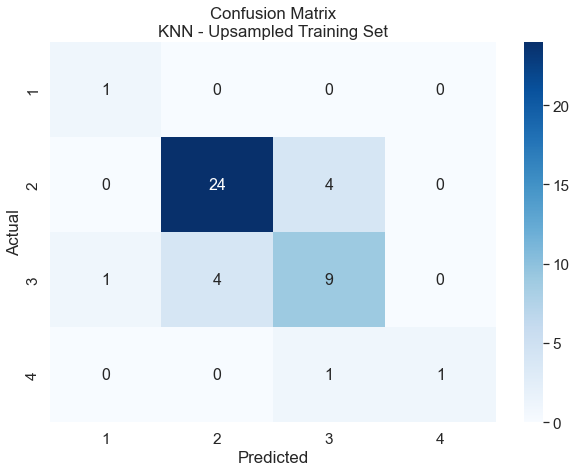

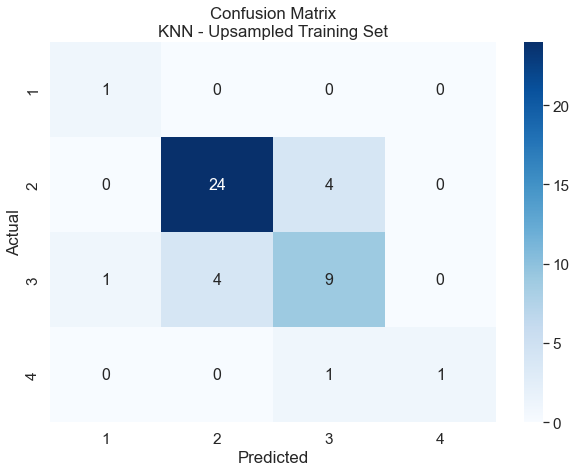

In [18]:
### Plot confusion matrix
confmatrix(knn_pred, "Confusion Matrix\nKNN - Regular Training Set")
confmatrix(knn_pred_up, "Confusion Matrix\nKNN - Upsampled Training Set")

If we observed the confusion matrices above, we can see that the KNN model that used the upsampled data predicted the minority classes (classes 1 and 4) well.

Cross-Validation of the KNN model

In [19]:
### Perform cross-validation then get the mean
knn_cv = np.mean(cross_val_score(knn, x, y, cv=10) * 100)
print("10-Fold Cross-Validation score for KNN fit in Regular Training Set:", knn_cv)

10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.04761904761904
10-Fold Cross-Validation score for KNN fit in Regular Training Set: 75.04761904761904


Decision Tree Classifier

Build/Train the DTree model

Two Decision Tree models are built. The variable dtree is fit on the regular data, while dtree_up is fit on upsampled data

In [20]:
### Instantiate the model
dtree = tree.DecisionTreeClassifier()
dtree_up = tree.DecisionTreeClassifier()

### Fit the model to the training set
dtree.fit(x_train, y_train)
dtree_up.fit(x_train_up, y_train_up)

DecisionTreeClassifier()

DecisionTreeClassifier()

Validate the DTree model

In [21]:
### Predict on the test set
dtree_pred = dtree.predict(x_test)
dtree_pred_up = dtree_up.predict(x_test)

Classification Report

In [22]:
### Get performance metrics
dtree_score = metrics.accuracy_score(y_test, dtree_pred) * 100
dtree_score_up = metrics.accuracy_score(y_test, dtree_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(dtree, metrics.classification_report(y_test, dtree_pred)))
print("Accuracy score:", dtree_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(dtree_up, metrics.classification_report(y_test, dtree_pred_up)))
print("Accuracy score:", dtree_score_up)

----- Regular Training Set Used -----
Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.75      0.75      0.75        28
           3       0.59      0.71      0.65        14
           4       0.00      0.00      0.00         2

    accuracy                           0.69        45
   macro avg       0.33      0.37      0.35        45
weighted avg       0.65      0.69      0.67        45

Accuracy score: 68.88888888888889

----- Upsampled Training Set Used -----
Classification report for DecisionTreeClassifier():
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.88      0.82      0.85        28
           3       0.71      0.86      0.77        14
           4       1.00      0.50      0.67         2

    accuracy                           0.82        45
   macro avg       0.9

Same as in KNN, the accuracy of dtree_up is way better than of the dtree.

Plotted below are the confusion matrices for each models.

Confusion Matrix

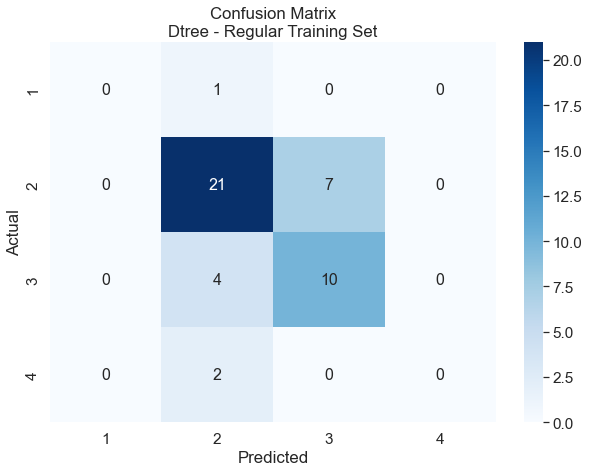

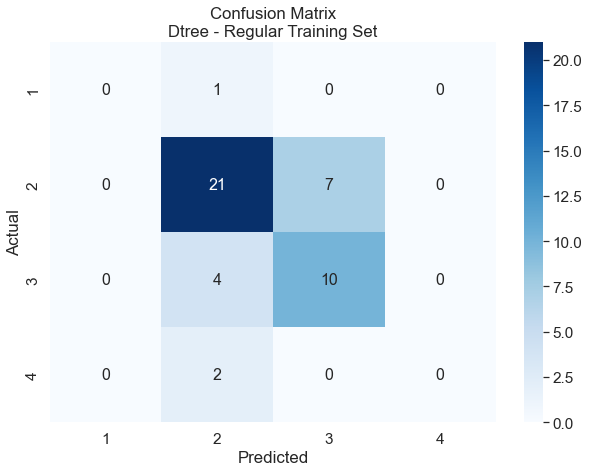

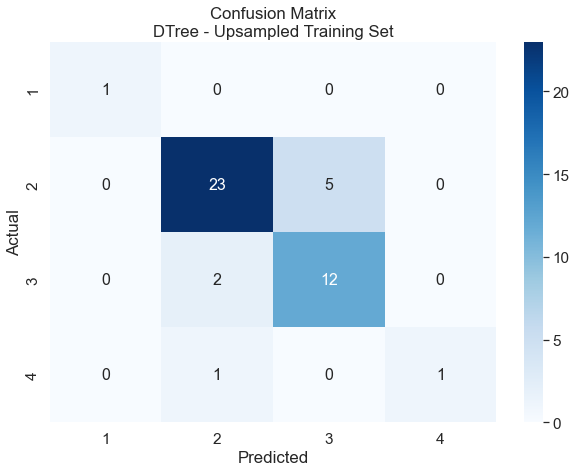

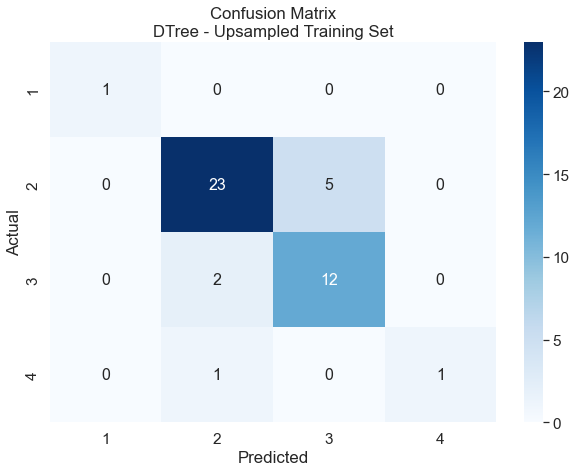

In [23]:
### Plot confusion matrix
confmatrix(dtree_pred, "Confusion Matrix\nDtree - Regular Training Set")
confmatrix(dtree_pred_up, "Confusion Matrix\nDTree - Upsampled Training Set")

As expected, dtree_up predicted classes 1 and 4 better than dtree.

Cross-Validation of the DTree model

In [24]:
### Perform cross-validation then get the mean
dtree_cv = np.mean(cross_val_score(dtree, x, y, cv=10) * 100)
print("Cross-Validation score for DTree (10 folds):", knn_cv)

Cross-Validation score for DTree (10 folds): 75.04761904761904
Cross-Validation score for DTree (10 folds): 75.04761904761904


Feature Importance

Let's look and compare the feature importances based on both decision trees.

The first table shows the complete and unsorted feature importances set by the decision trees on each predictors.

The second table shows the rank of feature importances of the decision trees.

In [25]:
### Extract Feature importance
### Then put into a DataFrame along with Feature Names for easier understanding.
df_feature_importance = pd.DataFrame(dtree.feature_importances_, index=x_train.columns, 
                                     columns=["Regular-Importance"])
df_feature_importance_up = pd.DataFrame(dtree_up.feature_importances_, index=x_train_up.columns, 
                                        columns=["Upsampled-Importance"])

### Merge the regular and upsampled feature importance
df_feature_importance_merged = pd.concat([df_feature_importance, df_feature_importance_up], axis=1)

### Print
print("Feature Importance - Complete")
df_feature_importance_merged.sort_values(["Regular-Importance"],ascending=False)

Feature Importance - Complete
Feature Importance - Complete


,Regular-Importance,Upsampled-Importance
special forms,0.215058,0.013045
lym.nodes enlar,0.205810,0.043522
block of affere,0.174549,0.068307
defect in node,0.078226,0.007471
changes in node,0.076133,0.018449
changes in lym.,0.055317,0.000000
changes in stru,0.051103,0.003250
lym.nodes dimin,0.047941,0.333333
early uptake in,0.034041,0.036235
exclusion of no,0.024585,0.016771


,Regular-Importance,Upsampled-Importance
special forms,0.215058,0.013045
lym.nodes enlar,0.205810,0.043522
block of affere,0.174549,0.068307
defect in node,0.078226,0.007471
changes in node,0.076133,0.018449
changes in lym.,0.055317,0.000000
changes in stru,0.051103,0.003250
lym.nodes dimin,0.047941,0.333333
early uptake in,0.034041,0.036235
exclusion of no,0.024585,0.016771


In [26]:
### Show top 5 important features
## Get top features for each model
df_top_features_reg = df_feature_importance.sort_values(["Regular-Importance"],ascending=False).reset_index(level=0).rename(columns={'index':'Regular-Feature'})
df_top_features_up = df_feature_importance_up.sort_values(["Upsampled-Importance"],ascending=False).reset_index(level=0).rename(columns={'index':'Upsampled-Feature'})

## Merge the top features
df_top_features = pd.concat([df_top_features_reg, df_top_features_up], axis=1)

## Print results
print("Ranked Feature Importance")
df_top_features

Ranked Feature Importance


,Regular-Feature,Regular-Importance,Upsampled-Feature,Upsampled-Importance
0,special forms,0.215058,lymphatics,0.342155
1,lym.nodes enlar,0.205810,lym.nodes dimin,0.333333
2,block of affere,0.174549,no. of nodes in,0.107759
3,defect in node,0.078226,block of affere,0.068307
4,changes in node,0.076133,lym.nodes enlar,0.043522
5,changes in lym.,0.055317,early uptake in,0.036235
6,changes in stru,0.051103,changes in node,0.018449
7,lym.nodes dimin,0.047941,exclusion of no,0.016771
8,early uptake in,0.034041,special forms,0.013045
9,exclusion of no,0.024585,extravasates,0.009704


Ranked Feature Importance


,Regular-Feature,Regular-Importance,Upsampled-Feature,Upsampled-Importance
0,special forms,0.215058,lymphatics,0.342155
1,lym.nodes enlar,0.205810,lym.nodes dimin,0.333333
2,block of affere,0.174549,no. of nodes in,0.107759
3,defect in node,0.078226,block of affere,0.068307
4,changes in node,0.076133,lym.nodes enlar,0.043522
5,changes in lym.,0.055317,early uptake in,0.036235
6,changes in stru,0.051103,changes in node,0.018449
7,lym.nodes dimin,0.047941,exclusion of no,0.016771
8,early uptake in,0.034041,special forms,0.013045
9,exclusion of no,0.024585,extravasates,0.009704


The top features of dtree are way different than that of dtree_up. Only the predictors block of affere and lym.nodes enlar remain on the top 5 features of both models.

These rankings can be used for future optimizations of the model and feature engineering.

# Visualize DTrees

Decision Tree Plot - Regular Training Set Used
Depth: 8 	 N-Leaves: 20
Decision Tree Plot - Regular Training Set Used
Depth: 8 	 N-Leaves: 20


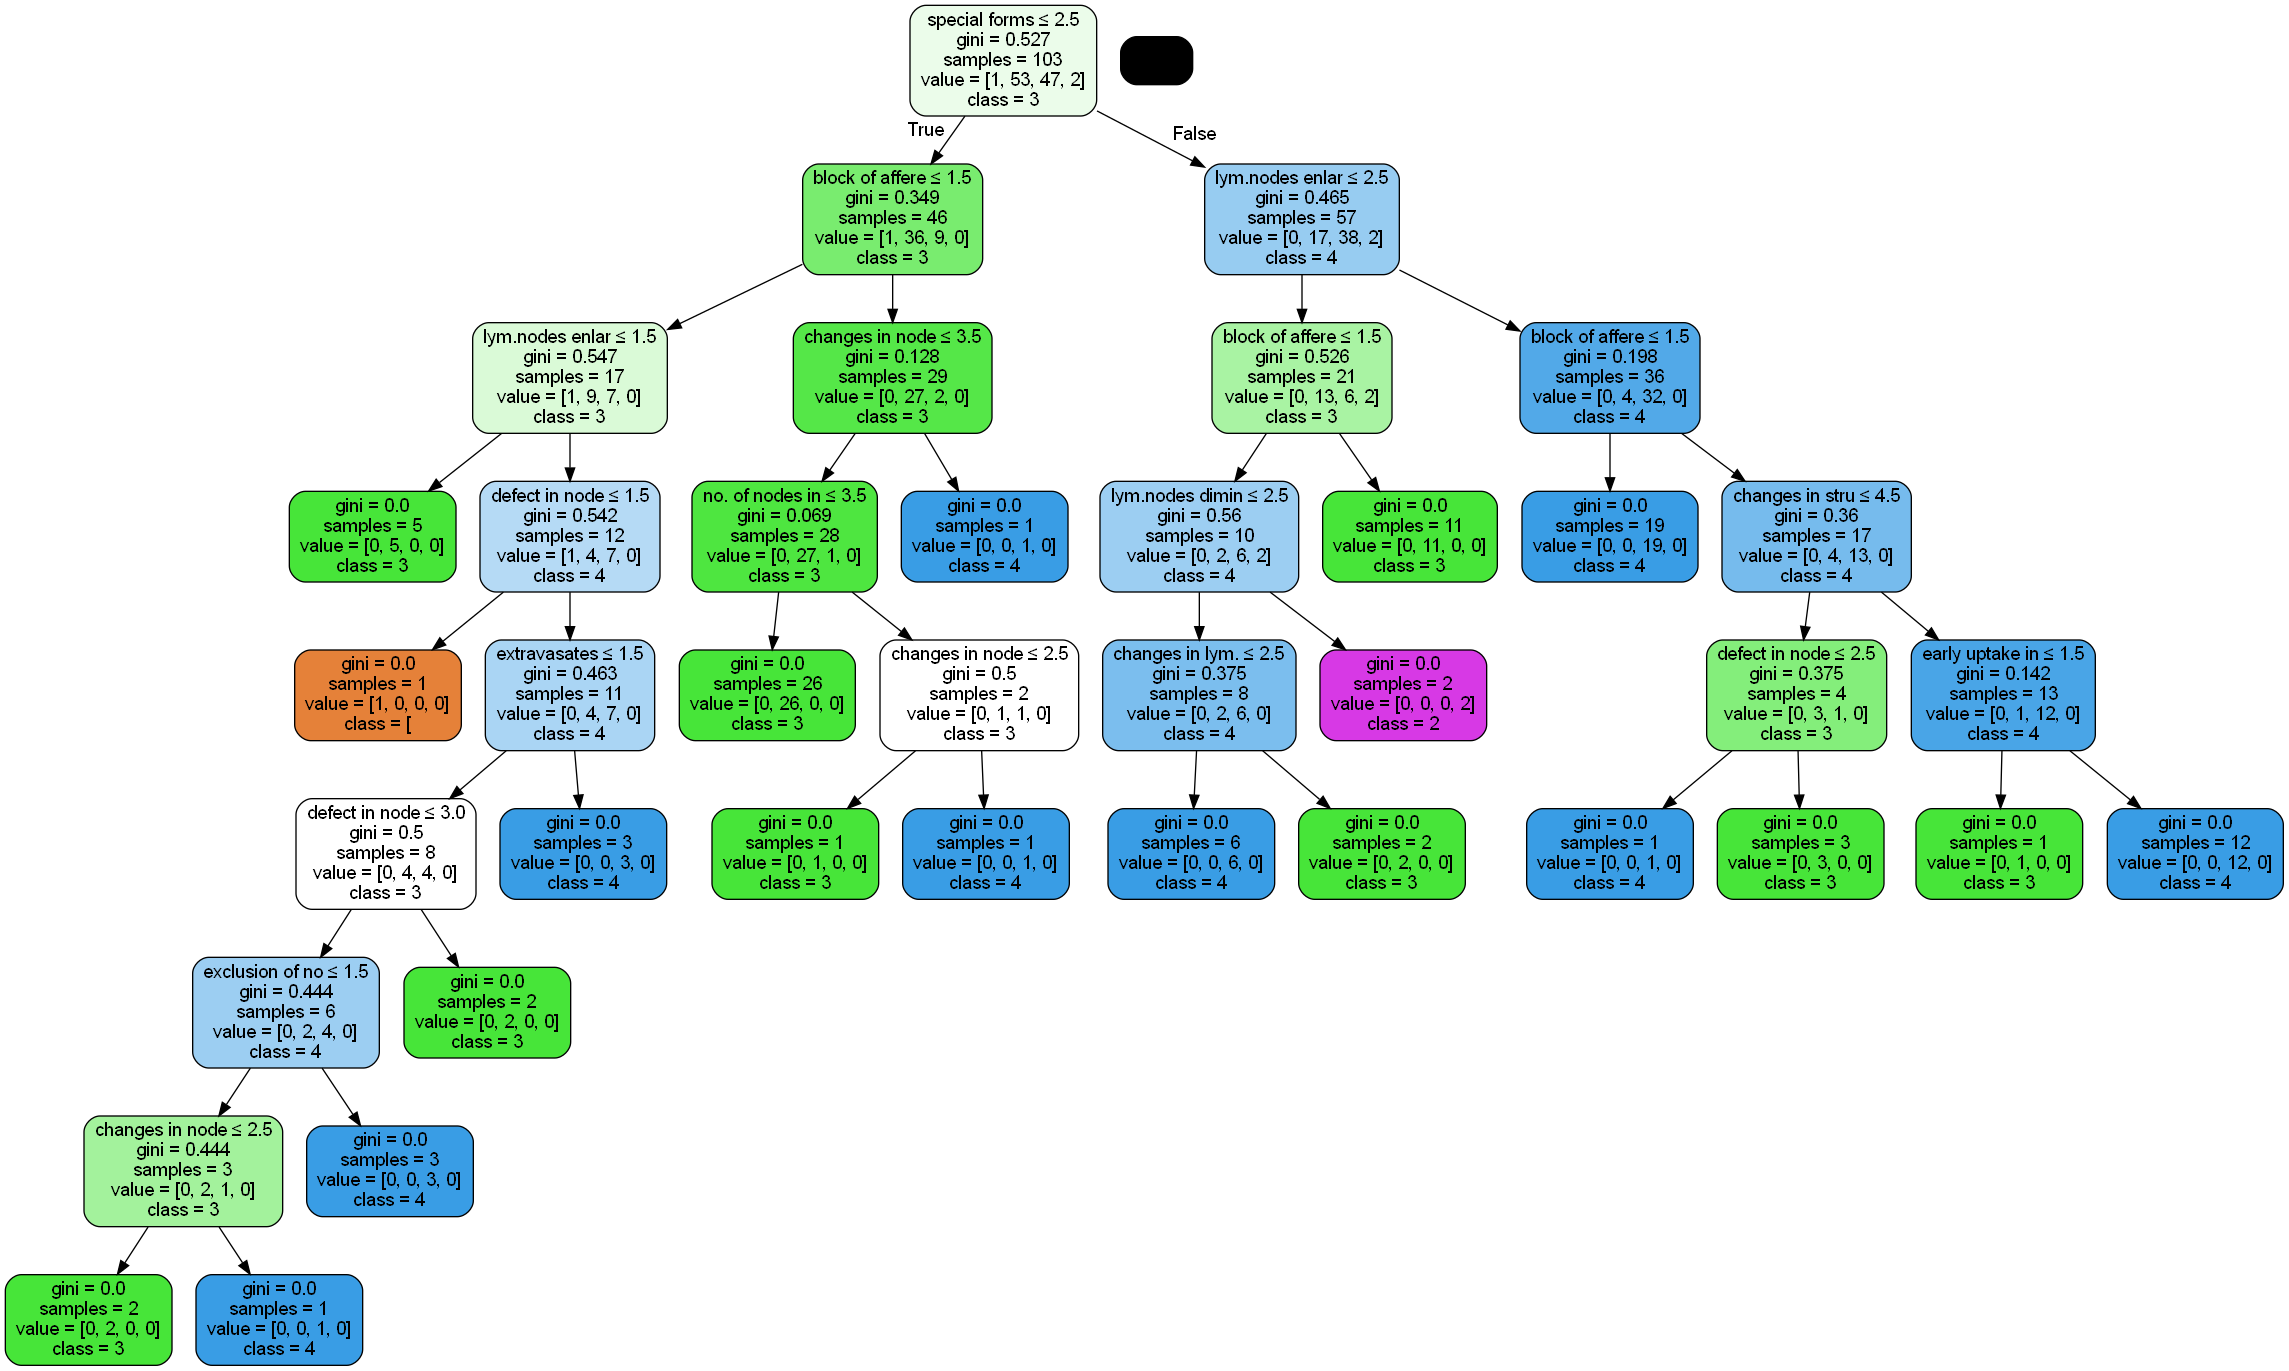

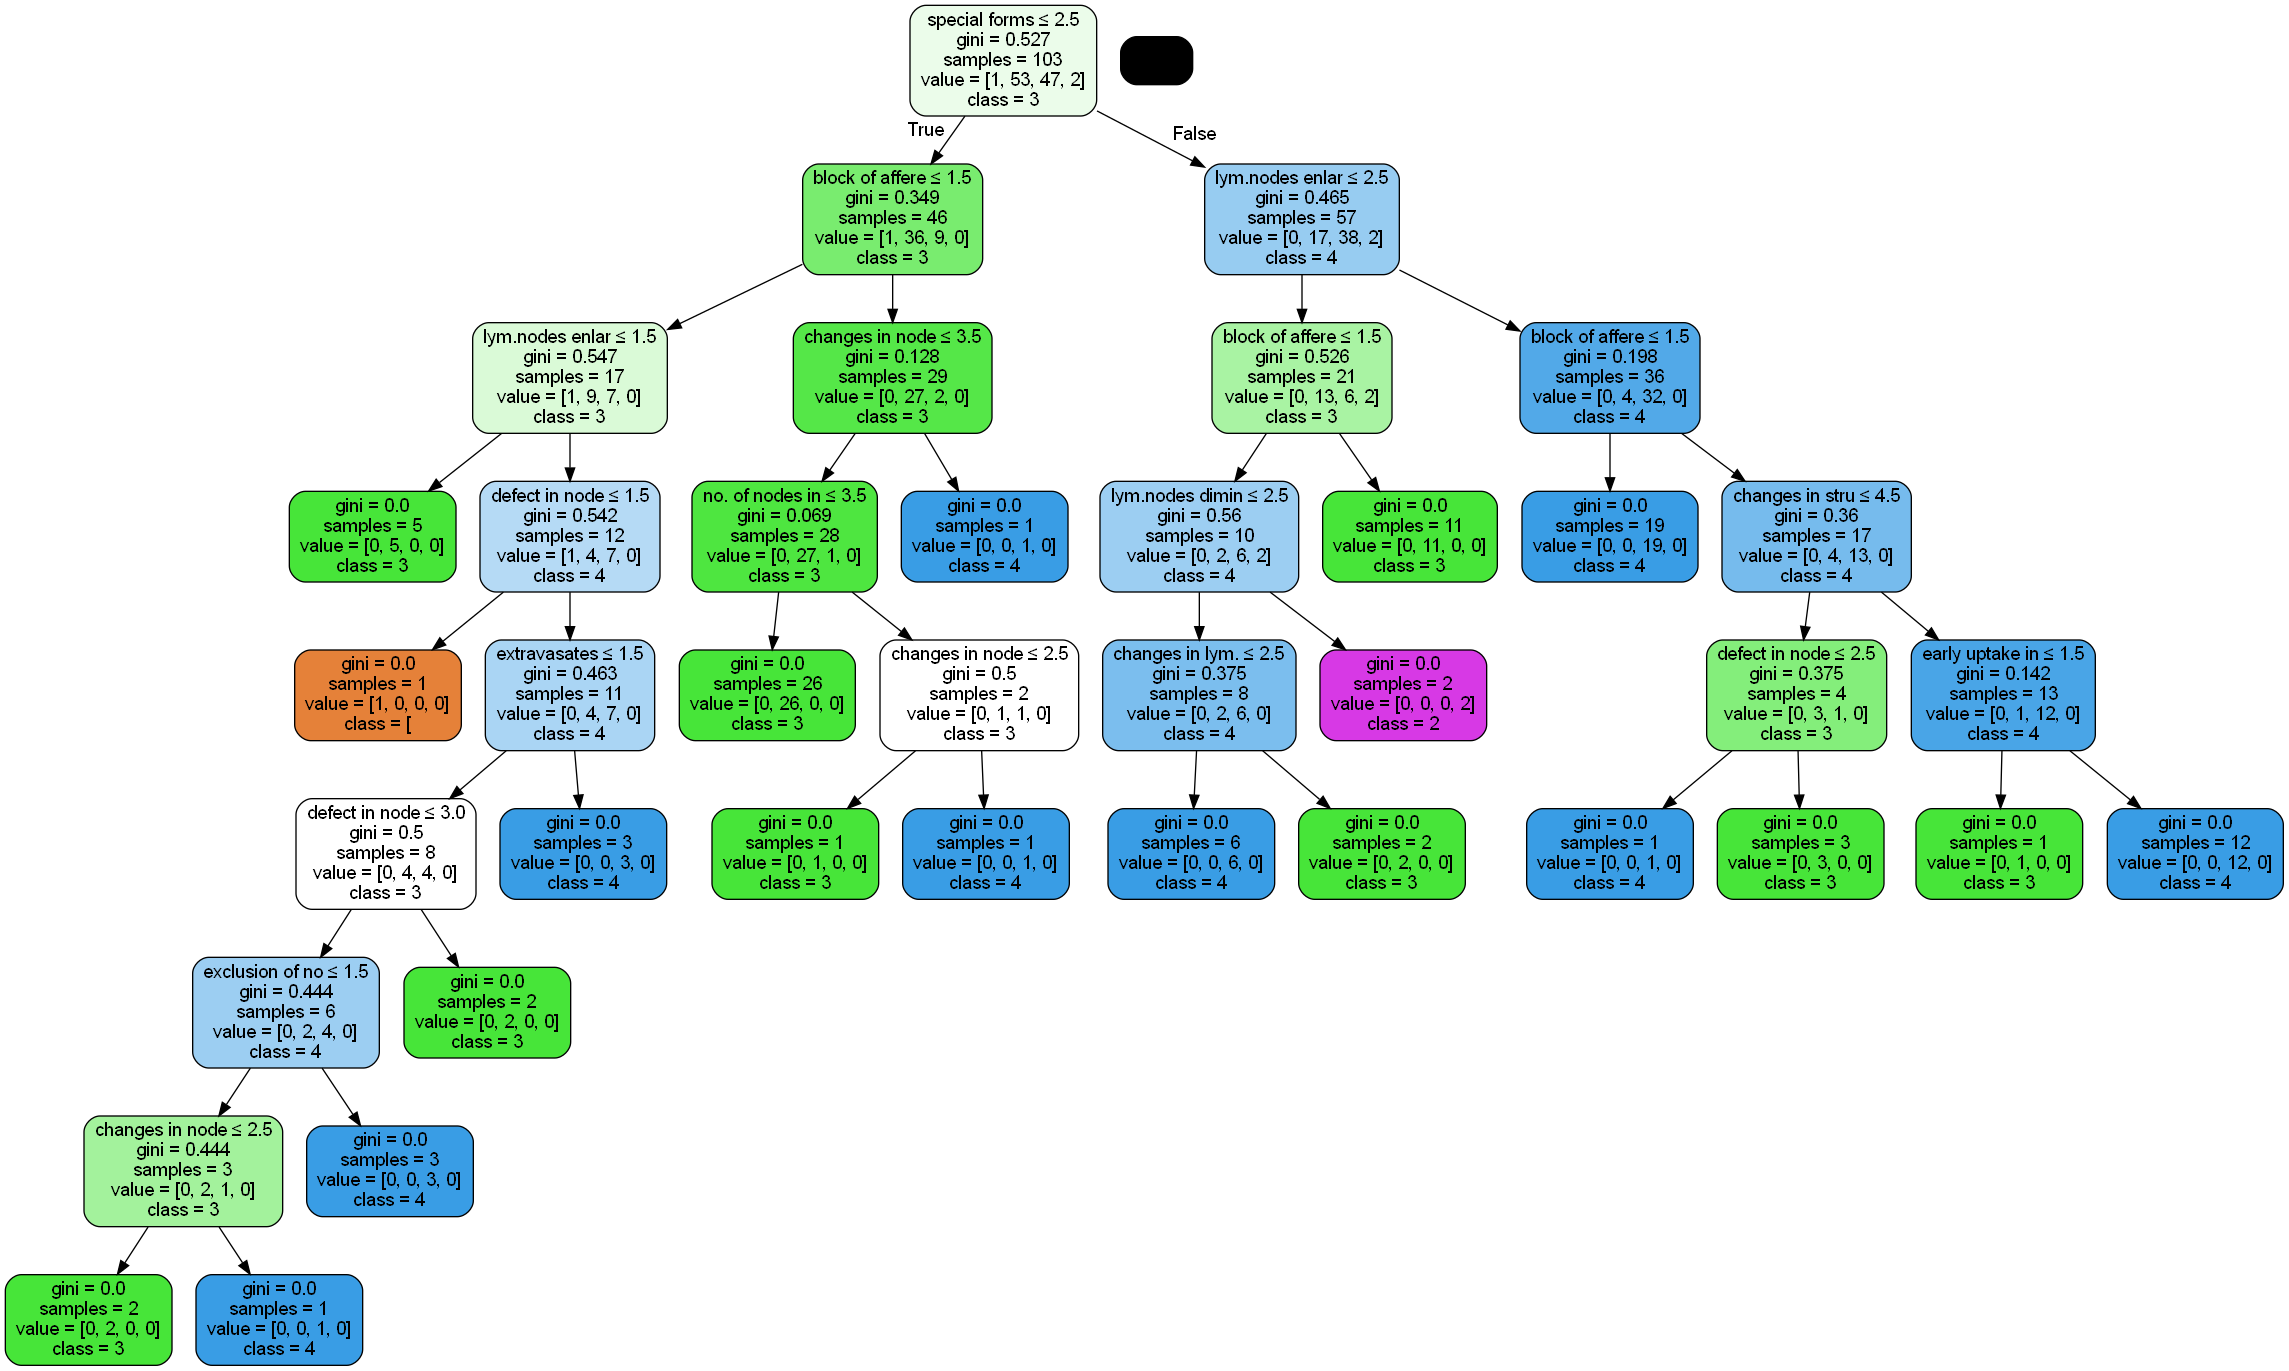

In [27]:
### Visualize Dtree model that used regular training set

print("Decision Tree Plot - Regular Training Set Used")
print("Depth: {} \t N-Leaves: {}".format(dtree.get_depth(), dtree.get_n_leaves()))

## Get the feature/attribute columns
feature_col = x_train.columns

## Get the class column
class_col = pd.unique(y_train)
class_col = np.array(class_col)
class_col = str(class_col).replace(" ", "")

## Plot tree
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, filled=True, rounded=True, special_characters=True,
               feature_names=feature_col, class_names=class_col)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

# Random Forest Classifier

Build/Train the RF model

Same as in the previous models, two random forest models are created: rf fit on not upsampled data and rf_up fit on upsampled data.

In [29]:
### Instantiate algorithm
rf = RandomForestClassifier()
rf_up = RandomForestClassifier()

### Fit the model to the data
rf.fit(x_train, y_train)
rf_up.fit(x_train_up, y_train_up)

RandomForestClassifier()

RandomForestClassifier()

# Validate the RF model

In [30]:
### Predict on the test set
rf_pred = rf.predict(x_test)
rf_pred_up = rf_up.predict(x_test)

Classification Report

In [31]:
### Get performance metrics
rf_score = metrics.accuracy_score(y_test, rf_pred) * 100
rf_score_up = metrics.accuracy_score(y_test, rf_pred_up) * 100

### Print classification report for regular
print("----- Regular Training Set Used -----")
print("Classification report for {}:\n{}".format(rf, metrics.classification_report(y_test, rf_pred)))
print("Accuracy score:", dtree_score)

### Print classification report for upsampled
print("\n----- Upsampled Training Set Used -----")
print("Classification report for {}:\n{}".format(rf_up, metrics.classification_report(y_test, rf_pred_up)))
print("Accuracy score:", rf_score_up)

----- Regular Training Set Used -----
Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.79      0.93      0.85        28
           3       0.83      0.71      0.77        14
           4       0.00      0.00      0.00         2

    accuracy                           0.80        45
   macro avg       0.41      0.41      0.41        45
weighted avg       0.75      0.80      0.77        45

Accuracy score: 68.88888888888889

----- Upsampled Training Set Used -----
Classification report for RandomForestClassifier():
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       0.87      0.93      0.90        28
           3       0.77      0.71      0.74        14
           4       1.00      0.50      0.67         2

    accuracy                           0.84        45
   macro avg       0.9

The model fit on upsampled data also performs better.



# Confusion Matrix

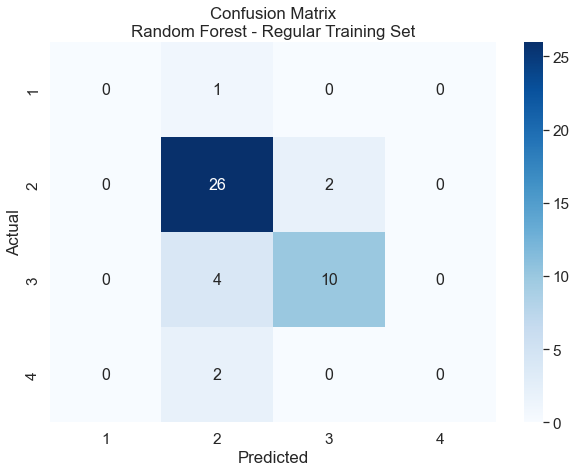

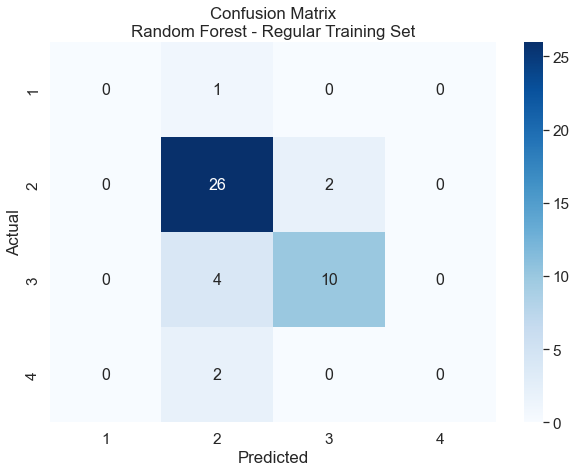

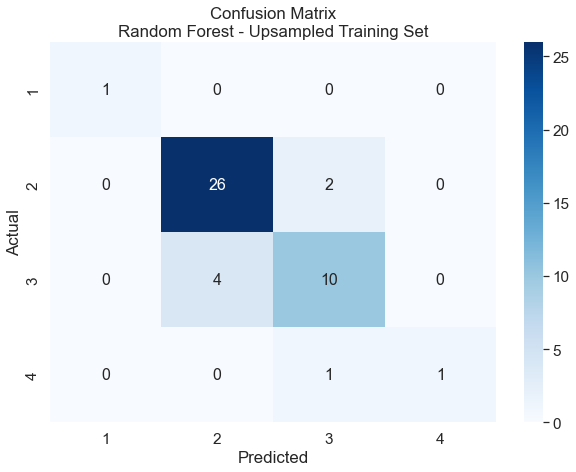

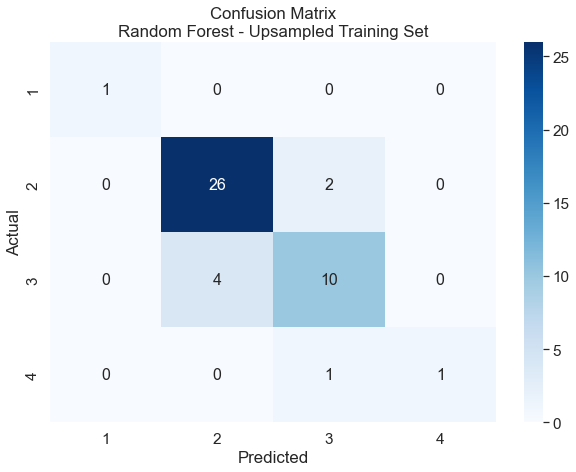

In [32]:
### Plot confusion matrix
confmatrix(rf_pred, "Confusion Matrix\nRandom Forest - Regular Training Set")
confmatrix(rf_pred_up, "Confusion Matrix\nRandom Forest - Upsampled Training Set")

When it comes to classifying the minority classes, the Random Forest model fit in upsampled data did not perform better than the previous models.

# Cross-Validation of the RF model

In [33]:
### Perform cross-validation then get the mean
rf_cv = np.mean(cross_val_score(rf, x, y, cv=10) * 100)
print("Cross-Validation score for RandomForest (10 folds):", rf_cv)

Cross-Validation score for RandomForest (10 folds): 84.42857142857143
Cross-Validation score for RandomForest (10 folds): 84.42857142857143


# Summary of Results

In [34]:
df_results = pd.DataFrame.from_dict({
    'Regular - Accuracy Score':{'KNN':knn_score, 'Decision Tree':dtree_score, 'Random Forest':rf_score},
    'Upsampled - Accuracy Score':{'KNN':knn_score_up, 'Decision Tree':dtree_score_up, 'Random Forest':rf_score_up},
    'Cross-Validation Score':{'KNN':knn_cv, 'Decision Tree':dtree_cv, 'Random Forest':rf_cv}
    })
df_results

,Regular - Accuracy Score,Upsampled - Accuracy Score,Cross-Validation Score
KNN,71.111111,77.777778,75.047619
Decision Tree,68.888889,82.222222,79.761905
Random Forest,80.000000,84.444444,84.428571


,Regular - Accuracy Score,Upsampled - Accuracy Score,Cross-Validation Score
KNN,71.111111,77.777778,75.047619
Decision Tree,68.888889,82.222222,79.761905
Random Forest,80.000000,84.444444,84.428571


Upsampling / Oversampling data improves the model performance, especially on cases like this where it is hard to gather data.

The Decision Tree fit on upsampled data has the highest accuracy score. But this does not mean that this is the overall best model for this dataset.

It still depends on the use case whether which models and metrics to consider.

For example, if we want to focus on classifying metastases (class == 2), it may be better to use Random forest than Decision Tree because the Random Forest model fit on upsampled data classifies metastases better than all the other models tried here.

Most of the data out there are imbalanced, and oversampling is just one of the many techniques to have a work around on this problem.